# Introductory examples

## 1.usa.gov data from bit.ly

In [ ]:
%pwd

In [ ]:
%cd ../book_scripts

In [ ]:
import pandas as pd

In [ ]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [ ]:
open(path).readline()

In [ ]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [ ]:
records[0]

In [ ]:
records[0]['tz']

In [ ]:
print(records[0]['tz'])

### Counting time zones in pure Python

In [ ]:
time_zones = [rec['tz'] for rec in records]

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [ ]:
time_zones[:10]

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
counts = get_counts(time_zones)

In [ ]:
counts['America/New_York']

In [ ]:
len(time_zones)

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [ ]:
top_counts(counts)

In [ ]:
from collections import Counter

In [ ]:
counts = Counter(time_zones)

In [ ]:
counts.most_common(10)

### Counting time zones with pandas

In [25]:
%matplotlib inline

In [13]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [ ]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame

In [ ]:
frame['tz'][:10]

In [ ]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

In [ ]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

In [ ]:
plt.figure(figsize=(10, 4))

In [ ]:
tz_counts[:10].plot(kind='barh', rot=0)

In [ ]:
frame['a'][1]

In [ ]:
frame['a'][50]

In [ ]:
frame['a'][51]

In [ ]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

In [ ]:
results.value_counts()[:8]

In [ ]:
cframe = frame[frame.a.notnull()]

In [ ]:
len(cframe)

In [ ]:
cframe['a'][:10]

In [ ]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

In [ ]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

In [ ]:
agg_counts.sum(1).argsort()

In [ ]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer

In [ ]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

In [ ]:
plt.figure()

In [ ]:
count_subset.plot(kind='barh', stacked=True)

In [ ]:
plt.figure()

In [ ]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [ ]:
%pwd
import os
os.path
#upath = os.path.expanduser('ch02/movielens/ml-1m/users.dat')
#upath

In [ ]:
import pandas as pd
encoding = 'latin1'

upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding, engine='python')
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding, engine='python')
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding, engine='python')

In [ ]:
users[:5]

In [ ]:
ratings[:5]

In [ ]:
movies[:5]

In [ ]:
ratings

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

In [ ]:
data.ix[0]

In [ ]:
type(data)

In [ ]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

In [ ]:
ratings_by_title = data.groupby('title').size()

In [ ]:
ratings_by_title[:5]

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [ ]:
active_titles[:10]

In [ ]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

In [ ]:
sevens = [title for title in mean_ratings.index if title.startswith('Seven')]
sevens

In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [ ]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

### Measuring rating disagreement

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [ ]:
mean_ratings

In [ ]:
sorted_by_diff = mean_ratings.sort_values(by='diff')#, ascending=False)
sorted_by_diff[:15]

In [ ]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

In [ ]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=True)[:10]

### US Baby Names 1880-2010

In [5]:
from __future__ import division
from numpy.random import randn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

u'/Users/1001235/MyDev/ws_study/pydata-book'

http://www.ssa.gov/oact/babynames/limits.html

In [ ]:
!head -n 10 ch02/names/yob1880.txt

In [4]:
import pandas as pd
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [19]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names = pd.read_pickle('ch02/all_names')

In [19]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [17]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [18]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


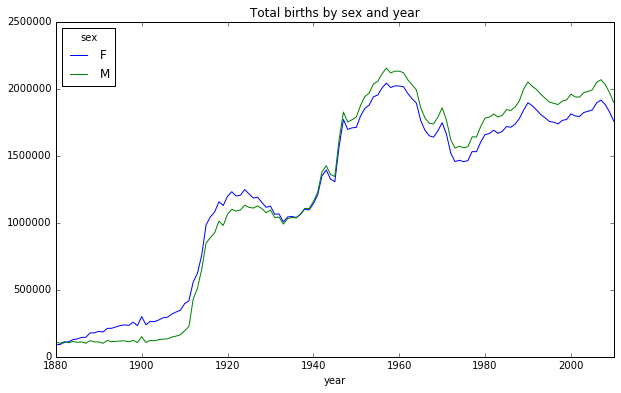

In [14]:
total_births.plot(title='Total births by sex and year')

In [7]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [8]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [9]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

In [27]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [35]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [36]:
top1000

name 
 sex 
 births 
 year 
 
 
 year 
 sex 
 
 
 
 
 
 
 
 
 
 1880 
 F 
 0 
 Mary 
 F 
 7065 
 1880 
 
 
 1 
 Anna 
 F 
 2604 
 1880 
 
 
 2 
 Emma 
 F 
 2003 
 1880 
 
 
 3 
 Elizabeth 
 F 
 1939 
 1880 
 
 
 4 
 Minnie 
 F 
 1746 
 1880 
 
 
 5 
 Margaret 
 F 
 1578 
 1880 
 
 
 6 
 Ida 
 F 
 1472 
 1880 
 
 
 7 
 Alice 
 F 
 1414 
 1880 
 
 
 8 
 Bertha 
 F 
 1320 
 1880 
 
 
 9 
 Sarah 
 F 
 1288 
 1880 
 
 
 10 
 Annie 
 F 
 1258 
 1880 
 
 
 11 
 Clara 
 F 
 1226 
 1880 
 
 
 12 
 Ella 
 F 
 1156 
 1880 
 
 
 13 
 Florence 
 F 
 1063 
 1880 
 
 
 14 
 Cora 
 F 
 1045 
 1880 
 
 
 15 
 Martha 
 F 
 1040 
 1880 
 
 
 16 
 Laura 
 F 
 1012 
 1880 
 
 
 17 
 Nellie 
 F 
 995 
 1880 
 
 
 18 
 Grace 
 F 
 982 
 1880 
 
 
 19 
 Carrie 
 F 
 949 
 1880 
 
 
 20 
 Maude 
 F 
 858 
 1880 
 
 
 21 
 Mabel 
 F 
 808 
 1880 
 
 
 22 
 Bessie 
 F 
 794 
 1880 
 
 
 23 
 Jennie 
 F 
 793 
 1880 
 
 
 24 
 Gertrude 
 F 
 787 
 1880 
 
 
 25 
 Julia 
 F 
 783 
 1880 
 
 
 26 
 Hattie 
 F 
 769 
 1880 
 
 
 27 
 Edith 
 F 
 768 
 1880 
 
 
 28 
 Mattie 
 F 
 704 
 1880 
 
 
 29 
 Rose 
 F 
 700 
 1880 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2010 
 M 
 1677617 
 Yair 
 M 
 201 
 2010 
 
 
 1677616 
 Talan 
 M 
 201 
 2010 
 
 
 1677614 
 Keyon 
 M 
 201 
 2010 
 
 
 1677613 
 Kael 
 M 
 201 
 2010 
 
 
 1677618 
 Demarion 
 M 
 200 
 2010 
 
 
 1677619 
 Gibson 
 M 
 200 
 2010 
 
 
 1677620 
 Reagan 
 M 
 200 
 2010 
 
 
 1677621 
 Cristofer 
 M 
 199 
 2010 
 
 
 1677622 
 Daylen 
 M 
 199 
 2010 
 
 
 1677623 
 Jordon 
 M 
 199 
 2010 
 
 
 1677624 
 Dashawn 
 M 
 198 
 2010 
 
 
 1677625 
 Masen 
 M 
 198 
 2010 
 
 
 1677629 
 Rowen 
 M 
 197 
 2010 
 
 
 1677631 
 Yousef 
 M 
 197 
 2010 
 
 
 1677630 
 Thaddeus 
 M 
 197 
 2010 
 
 
 1677628 
 Kadin 
 M 
 197 
 2010 
 
 
 1677627 
 Dillan 
 M 
 197 
 2010 
 
 
 1677626 
 Clarence 
 M 
 197 
 2010 
 
 
 1677634 
 Slade 
 M 
 196 
 2010 
 
 
 1677632 
 Clinton 
 M 
 196 
 2010 
 
 
 1677633 
 Sheldon 
 M 
 196 
 2010 
 
 
 1677636 
 Keshawn 
 M 
 195 
 2010 
 
 
 1677637 
 Menachem 
 M 
 195 
 2010 
 
 
 1677635 
 Joziah 
 M 
 195 
 2010 
 
 
 1677638 
 Bailey 
 M 
 194 
 2010 
 
 
 1677639 
 Camilo 
 M 
 194 
 2010 
 
 
 1677640 
 Destin 
 M 
 194 
 2010 
 
 
 1677641 
 Jaquan 
 M 
 194 
 2010 
 
 
 1677642 
 Jaydan 
 M 
 194 
 2010 
 
 
 1677645 
 Maxton 
 M 
 193 
 2010 
 
 
 
 261877 rows × 4 columns

In [38]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

/Users/1001235/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [32]:
top1000.index = np.arange(len(top1000))

NameError: name 'top1000' is not defined

In [40]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing naming trends

In [41]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [43]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [56]:
for name in total_births.keys():
    if name.startswith('Bo') : print name

Bo
Bob
Bobbi
Bobbie
Bobby
Bobbye
Bode
Bodhi
Bolden
Bonita
Bonnie
Bonny
Booker
Boris
Bose
Boss
Boston
Boyce
Boyd


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c44a310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x122875d90>], dtype=object)

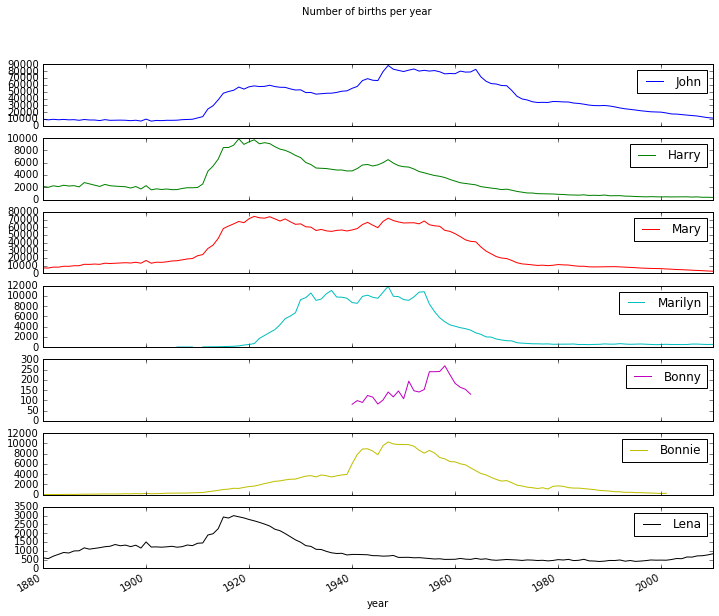

In [57]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn', 'Bonny', 'Bonnie', 'Lena']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [58]:
plt.figure()

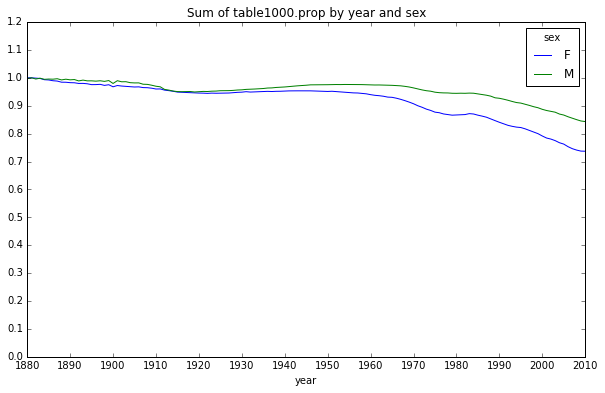

In [63]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [64]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [ ]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

In [ ]:
prop_cumsum.values.searchsorted(0.5)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

In [ ]:
diversity.plot(title="Number of popular names in top 50%")

#### The "Last letter" Revolution

In [20]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [22]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()
#subtable.sum()

sex 
 F 
 M 
 
 
 year 
 1910 
 1960 
 2010 
 1910 
 1960 
 2010 
 
 
 last_letter 
 
 
 
 
 
 
 
 
 
 
 a 
 108376.0 
 691247.0 
 670605.0 
 977.0 
 5204.0 
 28438.0 
 
 
 b 
 NaN 
 694.0 
 450.0 
 411.0 
 3912.0 
 38859.0 
 
 
 c 
 5.0 
 49.0 
 946.0 
 482.0 
 15476.0 
 23125.0 
 
 
 d 
 6750.0 
 3729.0 
 2607.0 
 22111.0 
 262112.0 
 44398.0 
 
 
 e 
 133569.0 
 435013.0 
 313833.0 
 28655.0 
 178823.0 
 129012.0

In [23]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [24]:
letter_prop = subtable / subtable.sum().astype(float)

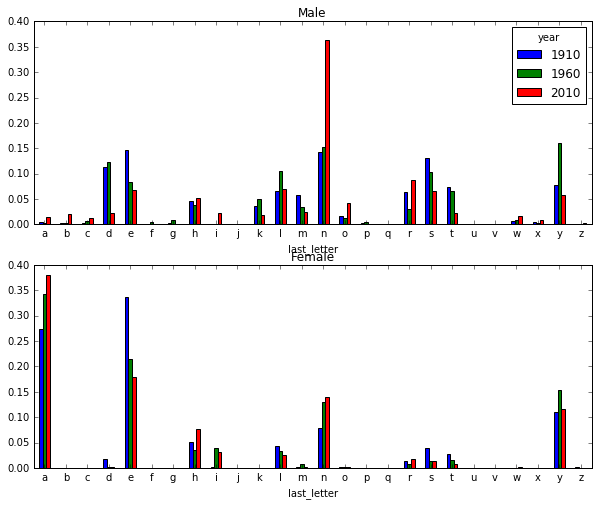

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [27]:
plt.subplots_adjust(hspace=0.25)

In [28]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [29]:
plt.close('all')

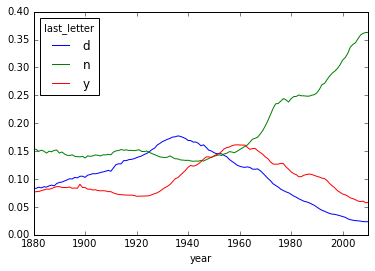

In [30]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [37]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [38]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [40]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [41]:
plt.close('all')

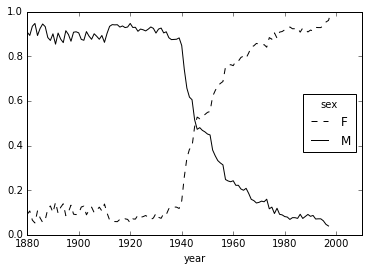

In [42]:
table.plot(style={'M': 'k-', 'F': 'k--'})